## Binomial logistic regression

In [1]:
# Import pandas and seaborn packages
import pandas as pd
import seaborn as sns

In [2]:
# Load in if csv file is in the same folder as notebook
activity = pd.read_csv("activity.csv")

### Exploratory data analysis

In [3]:
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [4]:
# Get summary statistics about the dataset

activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


## Construct binomial logistic regression model

In [8]:
# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
# Save X and y data into variables
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]

In [10]:
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [11]:
clf = LogisticRegression().fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Get coefficients and visualize model

In [12]:
# Print the coefficient
clf.coef_

array([[-0.1177466]])

In [13]:
# Print the intercept
clf.intercept_

array([6.10177895])

<AxesSubplot:xlabel='Acc (vertical)', ylabel='LyingDown'>

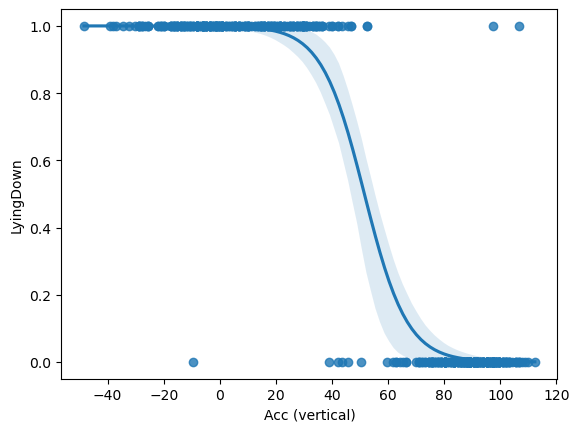

In [14]:
# Plot the logistic regression and its confidence band
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True)

### Confusion matrix

In [15]:
# Split data into training and holdout samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build regression model
clf = LogisticRegression().fit(X_train,y_train)

# Save predictions
y_pred = clf.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Print out the predicted labels
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [17]:
# Print out the predicted probabilities
clf.predict_proba(X_test)[::,-1]

array([2.31693308e-02, 9.97511568e-01, 1.04282071e-02, 1.05672351e-03,
       9.99781257e-01, 1.04282071e-02, 4.66017106e-03, 9.95733864e-01,
       9.72343955e-01, 2.31693308e-02, 9.97825589e-01, 1.36212174e-02,
       3.43616982e-02, 9.95733864e-01, 9.98892860e-01, 5.75929752e-02,
       4.77298577e-01, 6.09795092e-03, 9.98732777e-01, 9.92695617e-01,
       3.91403776e-02, 9.31712676e-01, 9.64063419e-01, 1.55638073e-02,
       9.83708329e-01, 1.19195424e-02, 7.55107906e-01, 8.74057100e-01,
       3.43616982e-02, 9.91646273e-01, 1.77763901e-02, 1.19195424e-02,
       9.97152314e-01, 2.64340977e-02, 9.98892860e-01, 1.19195424e-02,
       9.31712676e-01, 9.95119247e-01, 9.00935568e-01, 9.22594161e-01,
       8.39846087e-02, 9.99624389e-01, 1.19195424e-02, 8.01629006e-01,
       5.33106480e-03, 1.36212174e-02, 3.01447030e-02, 3.55976011e-03,
       4.07288328e-03, 1.19195424e-02, 9.98892860e-01, 6.53836704e-02,
       4.07288328e-03, 9.98892860e-01, 9.12067619e-03, 9.53422359e-01,
      

### Create confusion matrix

To finish this part of the course, we'll create a confusion matrix. Recall the following definition:

Confusion matrix: A graphical representation of how accurate a classifier is at predicting the labels for a categorical variable.
To create a confusion matrix, we'll use the confusion_matrix() function from the metrics module of scikit-learn. To use the function, we'll need to input the following:

    Actual labels of the holdout sample, stored as y_test
    Predicted labels of the holdout sample, stored as y_pred
    The names of the labels, which you can access using clf.classes_
Note: If there were more classes, we would have more numbers or labels in clf.classes_. Since this is a binomial logistic regression, there are only two labels, 0 and 1

To create a confusion matrix, we'll use the confusion_matrix() function from the metrics module of scikit-learn. To use the function, we'll need to input the following:

In [18]:
# Import the metrics module from scikit-learn
import sklearn.metrics as metrics

In [19]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [21]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

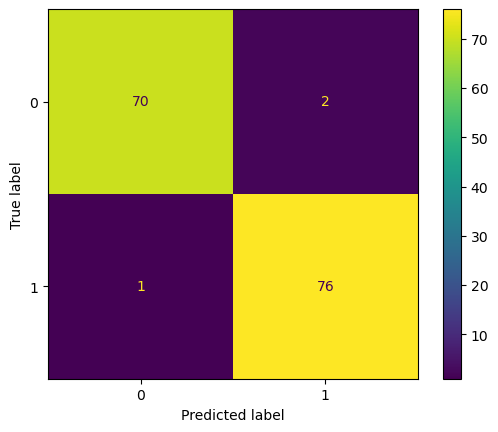

In [22]:
# Display the confusion matrix
disp.plot()

In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

        The upper-left quadrant displays the number of true negatives.
        The bottom-left quadrant displays the number of false negatives.
        The upper-right quadrant displays the number of false positives.
        The bottom-right quadrant displays the number of true positives.

We can define the above bolded terms as follows in our given context:

       True negatives:The number of people that were not lying down that the model accurately predicted were not lying down.
       False negatives:The number of people that were lying down that the model inaccurately predicted were not lying down.
       False positives:The number of people that were not lying down that the model inaccurately predicted were lying down.
       True positives:The number of people that were lying down that the model accurately predicted were lying down.
A perfect model would yield all true negatives and true positives, and no false negatives or false positives.